<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural networks + computer vision

In [2]:
#get data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-27 20:54:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   204MB/s    in 0.5s    

2022-07-27 20:54:12 (204 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### inspect data

In [3]:
!ls pizza_steak

test  train


In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(dirpath, len(dirnames), len(filenames))

pizza_steak 2 0
pizza_steak/train 2 0
pizza_steak/train/steak 0 750
pizza_steak/train/pizza 0 750
pizza_steak/test 2 0
pizza_steak/test/steak 0 250
pizza_steak/test/pizza 0 250


In [5]:
#get classnames
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

(509, 512, 3)


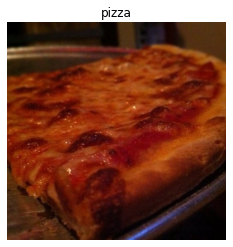

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random

def view_rand_img(target_dir, target_class):
  folder = target_dir+target_class
  rand_img = random.sample(os.listdir(folder), 1)
  img = mpimg.imread(folder + "/" + rand_img[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(img.shape)

  return img

img=view_rand_img("pizza_steak/train/", "pizza")

In [7]:
img.shape 

(509, 512, 3)

## end-to-end example

In [36]:
, shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG #batches of tensor image data with real-time data augmentation.

tf.random.set_seed(42)

#preprocess data
train_datagen = IDG(rescale=1./224,
                    rotation_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shuffle=True)
valid_datagen = IDG(rescale=1./224)

#paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data and turn to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

NameError: ignored

In [37]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Epoch 1/5
47/47 [==============================] - 23s 476ms/step - loss: 0.5421 - accuracy: 0.7287 - val_loss: 0.5244 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4632 - accuracy: 0.7920 - val_loss: 0.3699 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4200 - accuracy: 0.8053 - val_loss: 0.3638 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4334 - accuracy: 0.8067 - val_loss: 0.3245 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.3979 - accuracy: 0.8267 - val_loss: 0.2928 - val_accuracy: 0.8780


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## model debrief

In [11]:
img,labels = train_data.next()
len(img), len(labels)

(32, 32)

In [12]:
#kernels -> slide over image, larger kernal learn large features and vice-versa
#padding -> pads the target tensors with zeros, usually used for gathering more information from edges
#stride -> determines how much input information is compressed when kernel moves

#resource: https://poloclub.github.io/cnn-explainer/

#if theres disparity between train and validation sets, overfitting can be reduced by:
# a) Max Pooling (condenses image so only most important features are learned)
# b) data augmentation
#

### visualize augmented image

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


(-0.5, 223.5, 223.5, -0.5)

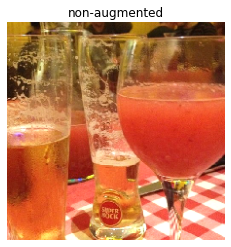

In [31]:
#augmented

augmented_datagen = IDG(rescale=1./224, 
                        rotation_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)

augmented_data = augmented_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)

img,labels = train_data.next()

img_a,labels_a = augmented_data.next()

from random import randint
i = randint(0,32)
plt.title('non-augmented')
plt.imshow(img[i])
plt.axis(False)

(-0.5, 223.5, 223.5, -0.5)

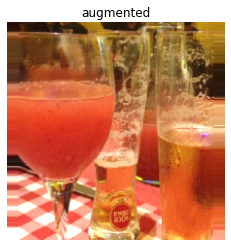

In [33]:
plt.title('augmented')
plt.imshow(img_a[i])
plt.axis(False)

### using custom image

(-0.5, 1023.5, 682.5, -0.5)

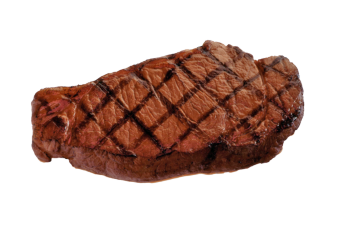

In [42]:
import matplotlib.image as mpimg

img = mpimg.imread("https://pngimg.com/uploads/steak/steak_PNG29.png")
plt.imshow(img)
plt.axis(False)

In [43]:
img.shape

(683, 1024, 4)

In [44]:
img

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.